## Wind Farm Applications

Much investigation is carried out to predict the annual energy production (AEP) of wind farms in assessment of
the viability of wind energy projects. Wind farm layout design is a multidisciplinary process with many design
variables. Aerodynamic variables including wind speed and direction are  characterized by much uncertainty.
However in some simulations these are usually treated deterministically, resulting in energy underproduction in
the operational lifetimes of farms. To develop more robust models the afore mentioned design variables must be
properly described to present a near real life situation. This work focuses on the quantification of uncertainties associated with yaw orientation, and wind speeds in wind farm layout optimization with Monte Carlo Methods. An understanding, and proper treatment of these uncertainties will greatly aid in the realization of more robust farm layout designs, ultimately improving the accuracy of annual power output predictions.


### Example 1 AEP  Calculation

We will consider the power of a wind farm to be a function of three classes of variables: uncertain variables $\zeta$, design variables $x$, and parameters $\theta$, $ P = P(\zeta, x, \theta)$.

  
|  |  |
|----------|----------|
| **Design, $x,y$:** | turbine locations x, and y |
| **Uncertain variables, $\zeta$:** | wind, speed and direction |
| **Parameters, $\theta$:** | yaw angles, turbine characteristics, and wake model parameters|



Uncertain variables are variables that follow a probability distribution, design variables are variables that an optimizer can vary, and parameters are constants. The classification of the variables is problem dependent. For instance, the height of a turbine could be considered as a design variable if we allow the optimizer to vary it, as an uncertain variable if we assume that due to terrain or manufacturing variability the exact height is unknown but follows a particular probability distribution, or as a parameter if we set the turbine height in the model at a fixed value. Another example is the rotor yaw, which can be considered a design variable or a parameter. A tunable parameter of a wake model, such as the wake coefficient expansion, could be
considered as a parameter or as an uncertain variable given by a particular distribution.
For the problems considered in this work, table 1 lists in which category we put each variable that influences the power computation. 

The power of the wind farm for a given wind direction and wind speed is equal to the sum of the power produced by each turbine

\begin{equation}
 P = \sum_{i=1}^{n_{turb}} P_{i} 
\end{equation}

The power of each turbine is calculated from

\begin{equation}
 P_{i} = \frac{1}{2}\rho C_P A U_{i}^{3} 
\end{equation}

where $\rho$ is the air density, $A$ is the rotor swept area, $C_P$ is the power coefficient, and $U_i$ is the effective hub velocity for each turbine, which is calculated by the wake model and is a function of the three types of variables described above

#### Wake model

A note on wake models?


In [12]:
import numpy as np


def jensen_wake(x, y):
    
    alpha = 0.1
    beta = 9.0
    delta = 5.0
    theta = np.arctan(y/(x + delta))  
    f = 0.0
    
    if np.abs(theta) < np.pi/beta:
        f = 0.5*(1. + np.cos(beta*theta))
    

   # normalized by U_inf
    U_hub = 1. - f*2./3.*(0.5/(0.5 + alpha*x))**2
    return U_hub

# print jensen_wake(4.,2.)


0.9369197686619234


#### Layout

We will begin by calculating the total power of a simplified wind farm with only four turbines.


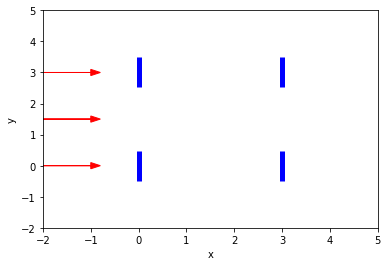

In [39]:
import matplotlib.pyplot as plt

x = [0., 3., 3., 0.]
y = [0., 0., 3., 3.]

plt.figure()
ax = plt.axes()
ax.arrow(-2, 3, 1., 0., head_width=0.2, head_length=0.2, fc='r', ec='r')
ax.arrow(-2, 1.5, 1., 0., head_width=0.2, head_length=0.2, fc='r', ec='r')
ax.arrow(-2, 0, 1., 0., head_width=0.2, head_length=0.2, fc='r', ec='r')

plt.plot(x, y, "b|", markersize=30, mew=5)
plt.xlim(-2, 5)
plt.ylim(-2, 5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [32]:

def Jensen_Power(x, y):
    
    rho = 1.1716
    a = 1. / 3.
    Cp = 4.*a*(1-a)**2.
    
    r0 = 10.
    U_inf = 8.
    A = np.pi*r0**2
    
    U_hub = np.zeros(len(x))
    Power = np.zeros(len(x))
    
    U_hub[0] = U_inf
    U_hub[1] = jensen_wake(x[1], y[1])
    U_hub[2] = jensen_wake(x[2], y[2])
    U_hub[3] = U_inf
    
    for i in range(len(U_hub)):
        
        Power[i] = 0.5*rho*Cp*A*U_hub[i]**3
    
    # Calculate power from each turbine
    return Power

x = [0., 3., 3., 0.]
y = [0., 0., 3., 3.]

print Jensen_Power(x,y)

[5.58374298e+04 4.41181005e+01 1.09057480e+02 5.58374298e+04]
